<a href="https://colab.research.google.com/github/Gaurav-phatkare/arXiv-Paper-Abstracts-Mutli-Label-Classification-Using-Deep-Learning/blob/main/Multilabel_Text_Classification_of_Research_Papers__different_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Aug  8 04:59:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
!pip install kaggle

In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d spsayakpaul/arxiv-paper-abstracts

 94% 42.0M/44.6M [00:02<00:00, 29.1MB/s]
100% 44.6M/44.6M [00:02<00:00, 21.2MB/s]


In [8]:
!unzip /content/arxiv-paper-abstracts.zip

Archive:  /content/arxiv-paper-abstracts.zip
  inflating: arxiv_data.csv          
  inflating: arxiv_data_210930-054931.csv  


#Load The Data

In [9]:
df = pd.read_csv("/content/arxiv_data.csv")

In [10]:
df.shape

(51774, 3)

In [11]:
df.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [12]:
df.iloc[4].summaries,df.iloc[4].terms

('To ensure safety in automated driving, the correct perception of the\nsituation inside the car is as important as its environment. Thus, seat\noccupancy detection and classification of detected instances play an important\nrole in interior sensing. By the knowledge of the seat occupancy status, it is\npossible to, e.g., automate the airbag deployment control. Furthermore, the\npresence of a driver, which is necessary for partially automated driving cars\nat the automation levels two to four can be verified. In this work, we compare\ndifferent statistical methods from the field of image segmentation to approach\nthe problem of background-foreground segmentation in camera based interior\nsensing. In the recent years, several methods based on different techniques\nhave been developed and applied to images or videos from different\napplications. The peculiarity of the given scenarios of interior sensing is,\nthat the foreground instances and the background both contain static as well as\

In [13]:
df['titles'].duplicated().sum()

12802

In [14]:
df.drop_duplicates(inplace = True)

In [15]:
df.shape

(38991, 3)

##Text Cleaning

In [16]:
import re
def Text_cleaning(text):
  text = re.sub(r"\n" , " ", text)

  text = re.sub(r"\s+" , " ", text)

  text = text.lower()
  text = text.replace('\n'," ")

  return text



In [17]:
Text_cleaning(df.iloc[4].summaries)

'to ensure safety in automated driving, the correct perception of the situation inside the car is as important as its environment. thus, seat occupancy detection and classification of detected instances play an important role in interior sensing. by the knowledge of the seat occupancy status, it is possible to, e.g., automate the airbag deployment control. furthermore, the presence of a driver, which is necessary for partially automated driving cars at the automation levels two to four can be verified. in this work, we compare different statistical methods from the field of image segmentation to approach the problem of background-foreground segmentation in camera based interior sensing. in the recent years, several methods based on different techniques have been developed and applied to images or videos from different applications. the peculiarity of the given scenarios of interior sensing is, that the foreground instances and the background both contain static as well as dynamic eleme

In [18]:
df['cleaned_summary'] = df['summaries'].apply(Text_cleaning)

In [19]:
df.head()

,titles,summaries,terms,cleaned_summary
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']",stereo matching is one of the widely used tech...
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']",the recent advancements in artificial intellig...
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']","in this paper, we proposed a novel mutual cons..."
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV'],consistency training has proven to be an advan...
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']","to ensure safety in automated driving, the cor..."


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38991 entries, 0 to 51772
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   titles           38991 non-null  object
 1   summaries        38991 non-null  object
 2   terms            38991 non-null  object
 3   cleaned_summary  38991 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [21]:
df.terms.value_counts()

['cs.CV']                                          12753
['cs.LG', 'stat.ML']                                4076
['cs.LG']                                           2047
['cs.CV', 'cs.LG']                                  1488
['cs.LG', 'cs.AI']                                  1207
                                                   ...  
['cs.LG', 'cs.CL', 'cs.HC', 'stat.ML']                 1
['cs.LG', 'cs.AI', 'cs.CL', 'cs.PL', 'stat.ML']        1
['cs.LG', 'cs.CL', 'stat.ME', 'stat.ML']               1
['cs.LG', 'cs.CL', 'cs.LO', 'stat.ML']                 1
['stat.ML', 'cs.CV', 'cs.LG', 'q-bio.QM']              1
Name: terms, Length: 3157, dtype: int64

In [22]:
new_df = df.groupby('terms').filter(lambda x: len(x) > 1)

In [23]:
new_df.terms.value_counts()

['cs.CV']                                                         12753
['cs.LG', 'stat.ML']                                               4076
['cs.LG']                                                          2047
['cs.CV', 'cs.LG']                                                 1488
['cs.LG', 'cs.AI']                                                 1207
                                                                  ...  
['cs.CV', 'cs.LG', 'eess.IV', 'eess.SP', 'stat.ML']                   2
['cs.LG', 'cs.CL', 'cs.CV', 'cs.NE', 'stat.ML']                       2
['stat.ML', 'cs.IT', 'cs.LG', 'math.IT', 'math.ST', 'stat.TH']        2
['cs.CV', 'cs.CL', 'cs.LG', 'eess.AS', 'eess.IV']                     2
['cs.LG', 'G.3']                                                      2
Name: terms, Length: 836, dtype: int64

In [24]:
len(new_df.iloc[2].terms),new_df.iloc[2].terms

(18, "['cs.CV', 'cs.AI']")

In [25]:
new_df['terms'].values[:5]

array(["['cs.CV', 'cs.LG']", "['cs.CV', 'cs.AI', 'cs.LG']",
       "['cs.CV', 'cs.AI']", "['cs.CV']", "['cs.CV', 'cs.LG']"],
      dtype=object)

## convert the string labels to lists of strings

In [26]:
import ast
new_df['terms'] = new_df['terms'].apply(lambda x: ast.literal_eval(x))

In [27]:
len(new_df.iloc[2].terms),new_df.iloc[2].terms

(2, ['cs.CV', 'cs.AI'])

In [28]:
new_df['terms'].values[:5]

array([list(['cs.CV', 'cs.LG']), list(['cs.CV', 'cs.AI', 'cs.LG']),
       list(['cs.CV', 'cs.AI']), list(['cs.CV']),
       list(['cs.CV', 'cs.LG'])], dtype=object)

In [29]:
new_df['terms'].explode().value_counts()[:10]

cs.CV      21334
cs.LG      20483
stat.ML    11422
cs.AI       5465
eess.IV     1585
cs.RO       1371
cs.CL        974
cs.NE        851
cs.CR        520
math.OC      452
Name: terms, dtype: int64

## Spliting into train test split

In [30]:
from sklearn.model_selection import train_test_split

def split_dataset(data, train_ratio=0.8, test_ratio=0.1, val_ratio=0.1, random_seed=42):

    train_data, temp_data = train_test_split(data, train_size=train_ratio, random_state=random_seed)
    test_data, val_data = train_test_split(temp_data, train_size=test_ratio / (test_ratio + val_ratio),
                                           random_state=random_seed)

    return train_data, test_data, val_data


train_data, test_data, val_data = split_dataset(new_df, train_ratio=0.8, test_ratio=0.1, val_ratio=0.1)


In [31]:
len(train_data),len(test_data),len(val_data)

(29336, 3667, 3667)

### Multi-label Binarization

In [32]:
tf.keras.layers.StringLookup(output_mode = 'multi_hot')

In [33]:
terms = tf.ragged.constant(train_data['terms'].values)
lookup = tf.keras.layers.StringLookup(output_mode = 'multi_hot')
lookup.adapt(terms)
vocab = lookup.get_vocabulary()

In [34]:
terms[:5]

<tf.RaggedTensor [[b'cs.CV', b'cs.LG', b'eess.IV'], [b'cs.CV', b'cs.AI', b'stat.ML'],
 [b'cs.LG'], [b'cs.CV'], [b'cs.CV', b'cs.AI']]>

In [35]:
vocab

['[UNK]',
 'cs.CV',
 'cs.LG',
 'stat.ML',
 'cs.AI',
 'eess.IV',
 'cs.RO',
 'cs.CL',
 'cs.NE',
 'cs.CR',
 'math.OC',
 'eess.SP',
 'cs.GR',
 'cs.SI',
 'cs.MM',
 'cs.SY',
 'cs.IR',
 'eess.SY',
 'cs.MA',
 'cs.HC',
 'cs.DC',
 'math.IT',
 'cs.IT',
 'cs.CY',
 'stat.AP',
 'stat.TH',
 'math.ST',
 'stat.ME',
 'eess.AS',
 'cs.SD',
 'q-bio.QM',
 'cs.DS',
 'q-bio.NC',
 'cs.NI',
 'cs.SE',
 'I.2.6',
 'stat.CO',
 'cs.CG',
 'cs.GT',
 'math.NA',
 'physics.chem-ph',
 'cs.NA',
 'cs.DB',
 'cs.LO',
 'cs.PL',
 '68T45',
 'q-bio.BM',
 'physics.comp-ph',
 'math.PR',
 'cs.AR',
 'cond-mat.dis-nn',
 'math.DS',
 'I.2.10',
 'cs.CE',
 'physics.data-an',
 'quant-ph',
 '68T05',
 'q-fin.ST',
 'cond-mat.stat-mech',
 'cs.DM',
 'physics.soc-ph',
 'cs.CC',
 'astro-ph.IM',
 'I.4.6',
 'q-bio.GN',
 'econ.EM',
 'physics.med-ph',
 'cs.PF',
 'I.4.8',
 'q-fin.TR',
 'physics.ao-ph',
 '68U10',
 'math.AT',
 'I.2',
 'hep-ex',
 'cs.FL',
 'cond-mat.mtrl-sci',
 'I.5.4',
 'I.4',
 'physics.optics',
 'physics.geo-ph',
 'math.AP',
 'I.4; I.5

In [36]:
def invert_multi_hot(encoded_labels):
  hot_indices = np.argwhere(encoded_labels == 1.0)[:,0]
  return np.take(vocab, hot_indices)

In [37]:
import numpy as np
ind = np.argwhere([1,0,0,1,0])[:,0]
np.take(['a','b','c','d','e'],ind)

array(['a', 'd'], dtype='<U1')

**Try multi hot with some sample**

In [38]:
sample_label = train_data['terms'].iloc[0]
sample_label

['cs.CV', 'cs.LG', 'eess.IV']

In [39]:
label_binarized = lookup(sample_label)
label_binarized

<tf.Tensor: shape=(151,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>

**Invert binarized labels to sample labels**

In [40]:
invert_multi_hot(label_binarized)

array(['cs.CV', 'cs.LG', 'eess.IV'], dtype='<U40')

In [41]:
def length(x):
  x = x.split(" ")
  return len(x)

In [42]:
train_data['cleaned_summary'].apply(length).describe()

count    29336.000000
mean       171.597491
std         45.364715
min          5.000000
25%        140.000000
50%        169.000000
75%        201.000000
max        498.000000
Name: cleaned_summary, dtype: float64

##Preprocessing the data

In [43]:
max_length = 250
batch_size = 32
padding_token = '<pad>'
auto = tf.data.AUTOTUNE

In [44]:
tf.ragged.constant(train_data['terms'].values)

<tf.RaggedTensor [[b'cs.CV', b'cs.LG', b'eess.IV'], [b'cs.CV', b'cs.AI', b'stat.ML'],
 [b'cs.LG'], ..., [b'cs.CV', b'cs.CL'], [b'cs.CV'], [b'cs.CV', b'cs.CL']]>

In [45]:
lookup([b'cs.CV', b'cs.AI', b'stat.ML']).numpy()

array([0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [46]:
vocabulary = set()
train_data['cleaned_summary'].str.split().apply(vocabulary.update)
vocabulary_size = len(vocabulary)
print(vocabulary_size)

141608


In [47]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens = vocabulary_size,
                                    output_sequence_length = max_length)

In [48]:
# train_data['cleaned_summary'].tolist()

In [49]:
text_vectorizer.adapt(train_data['cleaned_summary'].tolist())

In [50]:
import random

target_sentance = random.choice(train_data['cleaned_summary'].tolist())
print(f'text:\n{target_sentance}')
print(f'text_length:\n{length(target_sentance)}')
print(f'\nVectorized text: {text_vectorizer([target_sentance])}')

text:
inducing symmetry equivariance in deep neural architectures has resolved into improved data efficiency and generalization. in this work, we utilize the concept of scale and translation equivariance to tackle the problem of learning on time-series from raw waveforms. as a result, we obtain representations that largely resemble those of the wavelet transform at the first layer, but that evolve into much more descriptive ones as a function of depth. our empirical results support the suitability of our wavelet networks which with a simple architecture design perform consistently better than cnns on raw waveforms and on par with spectrogram-based methods.
text_length:
99

Vectorized text: [[ 4360  3025  3420     7    35    43   252    51  5646    89   404    22
    301     4   286     7    13    79     8   750     2   967     3   386
      4   653  3420     5   624     2    54     3    15    11   904    21
    963  8659    16     6   351     8   363   120    12  1434  5367   437
     

In [51]:

# get the config of our text vectorizer
text_vectorizer.get_config()


{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 141608,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 250,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 81092}

In [52]:
# custom text embedding

text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(text_vocab)}"),
print(f"Most common words in the vocabulary: {text_vocab[:5]}")
print(f"Least common words in the vocabulary: {text_vocab[-5:]}")

Number of words in vocabulary: 81092
Most common words in the vocabulary: ['', '[UNK]', 'the', 'of', 'and']
Least common words in the vocabulary: ['000168', '00013acer', '00010', '00003', '00002']


In [53]:
import tensorflow as tf

token_embed = tf.keras.layers.Embedding(input_dim = len(text_vocab),
                                        output_dim = 256,
                                        mask_zero = True,
                                        name = 'token_embedding')

In [54]:
print(f'Target sentance:\n{target_sentance}\n\n')
print(f'Vectorized target sentance:\n{text_vectorizer([target_sentance])}\n\n')
print(f'shape of vectorized sentance:{text_vectorizer([target_sentance]).shape}\n\n')
print(f'embedded target sentance:\n{token_embed(text_vectorizer([target_sentance]))}\n\n')
print(f'shape of embedded sentance:{token_embed(text_vectorizer([target_sentance])).shape}')

Target sentance:
inducing symmetry equivariance in deep neural architectures has resolved into improved data efficiency and generalization. in this work, we utilize the concept of scale and translation equivariance to tackle the problem of learning on time-series from raw waveforms. as a result, we obtain representations that largely resemble those of the wavelet transform at the first layer, but that evolve into much more descriptive ones as a function of depth. our empirical results support the suitability of our wavelet networks which with a simple architecture design perform consistently better than cnns on raw waveforms and on par with spectrogram-based methods.


Vectorized target sentance:
[[ 4360  3025  3420     7    35    43   252    51  5646    89   404    22
    301     4   286     7    13    79     8   750     2   967     3   386
      4   653  3420     5   624     2    54     3    15    11   904    21
    963  8659    16     6   351     8   363   120    12  1434  5367   43

In [55]:
# def make_dataset(dataframe, is_train=True):
#   labels = tf.ragged.constant(dataframe['terms'].values)
#   label_binarized = lookup(labels).numpy()
#   dataset = tf.data.Dataset.from_tensor_slices(
#       (dataframe['cleaned_summary'].values, label_binarized)
#   )
#   dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
#   return dataset.batch(batch_size)

In [56]:
train_sentances = train_data['cleaned_summary'].tolist()
val_sentances = val_data['cleaned_summary'].tolist()
test_sentances = test_data['cleaned_summary'].tolist()

In [57]:
def make_dataset(dataframe, is_train=True):
  labels = tf.ragged.constant(dataframe['terms'].values)
  label_binarized = lookup(labels).numpy()
  dataset = tf.data.Dataset.from_tensor_slices(
      (dataframe['cleaned_summary'].tolist(), label_binarized)
  )
  dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
  return dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [58]:
train_dataset = make_dataset(train_data, is_train= True)
val_dataset = make_dataset(val_data, is_train= False)
test_dataset = make_dataset(test_data, is_train= False)

In [59]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 151), dtype=tf.float32, name=None))>

#model 1 : Conv1D witth token embeddings

In [60]:
#model 1 : Conv1D witth token embeddings

import tensorflow as tf
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype = tf.string)
text_vectors = text_vectorizer(inputs)

token_embeddings = token_embed(text_vectors)

x = layers.Conv1D(64, kernel_size = 5, padding = 'same',activation = 'relu')(token_embeddings)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(151, activation = 'sigmoid')(x)
model_1 = tf.keras.Model(inputs,outputs)

model_1.compile(loss="binary_crossentropy", # if your labels are integer form (not one hot) use sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [61]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 250)              0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 250, 256)         20759552  
                                                                 
 conv1d (Conv1D)             (None, 250, 64)           81984     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 151)               9815  

In [62]:
# fit the model

model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch = int(0.1*len(train_dataset)),
                              epochs = 10,
                              validation_data = val_dataset,
                              validation_steps = int(0.1*len(val_dataset)))

Epoch 1/10
91/91 [==============================] - 30s 217ms/step - loss: 0.2147 - accuracy: 0.3898 - val_loss: 0.0274 - val_accuracy: 0.5341
Epoch 2/10
91/91 [==============================] - 13s 138ms/step - loss: 0.0284 - accuracy: 0.5501 - val_loss: 0.0263 - val_accuracy: 0.6335
Epoch 3/10
91/91 [==============================] - 8s 89ms/step - loss: 0.0285 - accuracy: 0.5457 - val_loss: 0.0260 - val_accuracy: 0.6506
Epoch 4/10
91/91 [==============================] - 9s 100ms/step - loss: 0.0279 - accuracy: 0.5955 - val_loss: 0.0257 - val_accuracy: 0.6278
Epoch 5/10
91/91 [==============================] - 4s 46ms/step - loss: 0.0262 - accuracy: 0.7349 - val_loss: 0.0221 - val_accuracy: 0.8097
Epoch 6/10
91/91 [==============================] - 4s 45ms/step - loss: 0.0241 - accuracy: 0.8245 - val_loss: 0.0208 - val_accuracy: 0.8722
Epoch 7/10
91/91 [==============================] - 5s 52ms/step - loss: 0.0224 - accuracy: 0.8698 - val_loss: 0.0203 - val_accuracy: 0.8920
Epoch 8/

In [63]:
# helper function
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))




  plt.figure(figsize = (8,4))
  plt.subplot(1,2,1)

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.subplot(1,2,2)


  # Plot accuracy
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

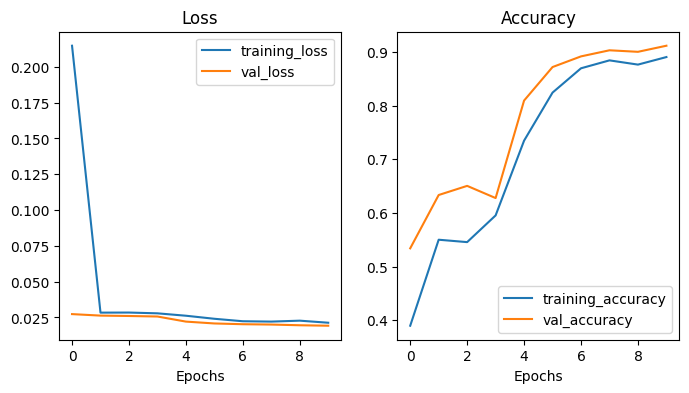

In [64]:
plot_loss_curves(model_1_history)

In [65]:
model_1.evaluate(val_dataset)

115/115 [==============================] - 1s 6ms/step - loss: 0.0212 - accuracy: 0.9007


[0.02117079123854637, 0.9007362723350525]

In [66]:
model_1.evaluate(test_dataset)

115/115 [==============================] - 1s 5ms/step - loss: 0.0213 - accuracy: 0.8956


[0.021265733987092972, 0.8955549597740173]

In [67]:
model_1_pred_probs = model_1.predict(test_dataset)
model_1_pred_probs

115/115 [==============================] - 1s 4ms/step


array([[3.71547270e-04, 5.82515374e-02, 9.51752245e-01, ...,
        4.24859063e-05, 1.77090944e-04, 1.78010756e-04],
       [1.60349500e-05, 9.88866031e-01, 1.04279630e-01, ...,
        1.80710587e-04, 1.51827435e-05, 2.84762245e-05],
       [2.29666271e-04, 3.30895633e-02, 9.76431966e-01, ...,
        1.96067176e-05, 1.01255668e-04, 9.78154421e-05],
       ...,
       [2.86884938e-06, 9.60887790e-01, 1.93750441e-01, ...,
        1.40184902e-05, 4.32680235e-06, 3.70639759e-06],
       [5.61213085e-07, 9.97881472e-01, 3.59745324e-02, ...,
        6.79380719e-06, 7.62260981e-07, 8.77231344e-07],
       [9.92725982e-05, 5.02034068e-01, 7.80899525e-01, ...,
        6.87096472e-05, 1.50471969e-04, 7.27364604e-05]], dtype=float32)

In [68]:
model_1_pred_probs.shape

(3667, 151)

In [69]:
test_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 151), dtype=tf.float32, name=None))>

In [70]:
text, label = next(iter(test_dataset))

print(text[15])
print(label[15])
print(invert_multi_hot(label[15]))

tf.Tensor(b"in this work, we perform unsupervised learning of representations by maximizing mutual information between an input and the output of a deep neural network encoder. importantly, we show that structure matters: incorporating knowledge about locality of the input to the objective can greatly influence a representation's suitability for downstream tasks. we further control characteristics of the representation by matching to a prior distribution adversarially. our method, which we call deep infomax (dim), outperforms a number of popular unsupervised learning methods and competes with fully-supervised learning on several classification tasks. dim opens new avenues for unsupervised learning of representations and is an important step towards flexible formulations of representation-learning objectives for specific end-goals.", shape=(), dtype=string)
tf.Tensor(
[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [71]:
test_pred_prob = model_1_pred_probs[15]

In [72]:
test_pred_prob.shape

(151,)

In [73]:
sorted_prob = sorted(zip(test_pred_prob, vocab), key = lambda pair : pair[0],reverse = True)

In [74]:
sorted_prob[:10]

[(0.9617836, 'cs.LG'),
 (0.6148493, 'stat.ML'),
 (0.25072816, 'cs.AI'),
 (0.0601808, 'cs.CV'),
 (0.033442985, 'math.OC'),
 (0.029870553, 'cs.NE'),
 (0.019042311, 'cs.CL'),
 (0.018458175, 'cs.CR'),
 (0.015847808, 'cs.SI'),
 (0.0143085625, 'cs.SY')]

In [75]:
i, j = next(iter(test_dataset))
print(i[21])
print(j[21])
print(invert_multi_hot(j[21]))

tf.Tensor(b"deep learning achieves state-of-the-art results in many tasks in computer vision and natural language processing. however, recent works have shown that deep networks can be vulnerable to adversarial perturbations, which raised a serious robustness issue of deep networks. adversarial training, typically formulated as a robust optimization problem, is an effective way of improving the robustness of deep networks. a major drawback of existing adversarial training algorithms is the computational overhead of the generation of adversarial examples, typically far greater than that of the network training. this leads to the unbearable overall computational cost of adversarial training. in this paper, we show that adversarial training can be cast as a discrete time differential game. through analyzing the pontryagin's maximal principle (pmp) of the problem, we observe that the adversary update is only coupled with the parameters of the first layer of the network. this inspires us to

In [76]:
# i['']

In [77]:
test2 = model_1.predict(["deep learning achieves state-of-the-art results in many tasks in computer vision and natural language processing. however, recent works have shown that deep networks can be vulnerable to adversarial perturbations, which raised a serious robustness issue of deep networks. adversarial training, typically formulated as a robust optimization problem, is an effective way of improving the robustness of deep networks. a major drawback of existing adversarial training algorithms is the computational overhead of the generation of adversarial examples, typically far greater than that of the network training. this leads to the unbearable overall computational cost of adversarial training. in this paper, we show that adversarial training can be cast as a discrete time differential game. through analyzing the pontryagin's maximal principle (pmp) of the problem, we observe that the adversary update is only coupled with the parameters of the first layer of the network. this inspires us to restrict most of the forward and back propagation within the first layer of the network during adversary updates. this effectively reduces the total number of full forward and backward propagation to only one for each group of adversary updates. therefore, we refer to this algorithm yopo (you only propagate once). numerical experiments demonstrate that yopo can achieve comparable defense accuracy with approximately 1/5 ~ 1/4 gpu time of the projected gradient descent (pgd) algorithm. our codes are available at https://https://github.com/a1600012888/yopo-you-only-propagate-once."])

1/1 [==============================] - 0s 214ms/step


In [78]:
tf.squeeze(test2).numpy()

array([1.13612601e-04, 2.47010216e-01, 9.02216256e-01, 4.87285048e-01,
       1.81279466e-01, 2.03380678e-02, 1.07357856e-02, 1.19431242e-02,
       2.13454403e-02, 1.70227699e-02, 1.47856222e-02, 5.85269835e-03,
       3.02933832e-03, 6.77742809e-03, 3.68505763e-03, 8.03576037e-03,
       6.89550629e-03, 5.15026972e-03, 6.04630401e-03, 7.17037497e-03,
       2.53954763e-03, 1.79617398e-03, 1.42934651e-03, 5.97384200e-03,
       1.73440122e-03, 2.39167875e-03, 2.18012277e-03, 2.16755783e-03,
       4.36579436e-03, 5.11646876e-03, 7.50589650e-04, 1.72788382e-03,
       6.63601211e-04, 8.17438122e-04, 1.71827176e-03, 1.07748725e-03,
       9.56412347e-04, 9.28326976e-04, 1.00700138e-03, 5.15870401e-04,
       5.00520691e-04, 3.47165042e-04, 5.78818668e-04, 1.85140385e-03,
       9.86958505e-04, 6.61831466e-04, 1.32072985e-03, 6.23502128e-04,
       3.46051675e-04, 3.76635406e-04, 5.55923034e-04, 2.27314347e-04,
       5.97743783e-04, 2.91143748e-04, 7.98586843e-05, 2.68319825e-04,
      

In [79]:
sorted_prob_01 = sorted(zip(tf.squeeze(test2).numpy(), vocab), key = lambda pair : pair[0],reverse = True)

In [80]:
sorted_prob_01[:10]

[(0.90221626, 'cs.LG'),
 (0.48728505, 'stat.ML'),
 (0.24701022, 'cs.CV'),
 (0.18127947, 'cs.AI'),
 (0.02134544, 'cs.NE'),
 (0.020338068, 'eess.IV'),
 (0.01702277, 'cs.CR'),
 (0.014785622, 'math.OC'),
 (0.011943124, 'cs.CL'),
 (0.010735786, 'cs.RO')]

In [81]:
# test_samples  = test_data.sample(10)
# labels = tf.ragged.constant(test_samples['terms'].values)
# label_binarized = lookup(labels).numpy()
# test_tensor_dataset = tf.data.Dataset.from_tensor_slices((test_samples['cleaned_summary'].tolist(),label_binarized)).batch(100)

In [82]:
# test_tensor_dataset

In [83]:
# text, label = next(iter(test_tensor_dataset))
# print(label)

## Function to Predict and return Output with actual labels

In [84]:
test_samples  = test_data.sample(5)
labels = tf.ragged.constant(test_samples['terms'].values)
label_binarized = lookup(labels).numpy()
test_tensor_dataset = tf.data.Dataset.from_tensor_slices((test_samples['cleaned_summary'].tolist(),label_binarized)).batch(5)


def predict_abstract(model):


    abs, encoded_label = next(iter(test_tensor_dataset))

    pred_prob = model.predict(test_tensor_dataset)

    for i, text in enumerate(abs):
        label = invert_multi_hot(encoded_label[i])
        print(f'Abstract:{text}')
        print(f'Actual labels:{label}')
        pred = sorted(zip(tf.squeeze(pred_prob[i]).numpy(), vocab), key = lambda pair : pair[0],reverse = True)
        print(f"predicted_labels(with probability):")
        for i,j in pred[:5]:
            print(f"{j} - {round(i*100,2)}%")
        print("")

In [85]:
test_samples[:5]

,titles,summaries,terms,cleaned_summary
33855,Black-box Off-policy Estimation for Infinite-H...,Off-policy estimation for long-horizon problem...,"[cs.LG, cs.AI, stat.ML]",off-policy estimation for long-horizon problem...
11155,Solving Machine Learning Problems,Can a machine learn Machine Learning? This wor...,[cs.LG],can a machine learn machine learning? this wor...
1206,A Parallel Framework for Parametric Maximum Fl...,This paper presents a framework that supports ...,[cs.CV],this paper presents a framework that supports ...
3602,Deep Autoencoding Models for Unsupervised Anom...,Reliably modeling normality and differentiatin...,[cs.CV],reliably modeling normality and differentiatin...
3739,Stochastic Descent Analysis of Representation ...,Although stochastic approximation learning met...,"[stat.ML, cs.LG]",although stochastic approximation learning met...


In [86]:
predict_abstract(model_1)

1/1 [==============================] - 0s 43ms/step
Abstract:b'off-policy estimation for long-horizon problems is important in many real-life applications such as healthcare and robotics, where high-fidelity simulators may not be available and on-policy evaluation is expensive or impossible. recently, \\cite{liu18breaking} proposed an approach that avoids the \\emph{curse of horizon} suffered by typical importance-sampling-based methods. while showing promising results, this approach is limited in practice as it requires data be drawn from the \\emph{stationary distribution} of a \\emph{known} behavior policy. in this work, we propose a novel approach that eliminates such limitations. in particular, we formulate the problem as solving for the fixed point of a certain operator. using tools from reproducing kernel hilbert spaces (rkhss), we develop a new estimator that computes importance ratios of stationary distributions, without knowledge of how the off-policy data are collected. we a

# Model 2: Tf Hub pretrained Feature Extractor

In [87]:
# Download pretrained Tf Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        trainable = False,
                                        name = 'universal_sentance_encoder')

In [88]:
# Test out the pretrained embedding on a random sentance

random_train_sentance = random.choice(train_sentances)

print(f'Random sentance is:\n{random_train_sentance}\n\n')
print(f"embedding sentance:\n{tf_hub_embedding_layer([random_train_sentance])}\n\n")
print(tf_hub_embedding_layer([random_train_sentance]).shape)


Random sentance is:
we present \textsc{vx2text}, a framework for text generation from multimodal inputs consisting of video plus text, speech, or audio. in order to leverage transformer networks, which have been shown to be effective at modeling language, each modality is first converted into a set of language embeddings by a learnable tokenizer. this allows our approach to perform multimodal fusion in the language space, thus eliminating the need for ad-hoc cross-modal fusion modules. to address the non-differentiability of tokenization on continuous inputs (e.g., video or audio), we utilize a relaxation scheme that enables end-to-end training. furthermore, unlike prior encoder-only models, our network includes an autoregressive decoder to generate open-ended text from the multimodal embeddings fused by the language encoder. this renders our approach fully generative and makes it directly applicable to different "video+$x$ to text" problems without the need to design specialized netwo

##Build model with pretrined tf hub models

In [89]:

# define feature extraction layers
inputs = layers.Input(shape = [], dtype = tf.string)

pretrained_embedding = tf_hub_embedding_layer(inputs)

x = layers.Dense(128, activation = 'relu')(pretrained_embedding)

outputs = layers.Dense(151, activation = 'sigmoid')(x)

model_2 = tf.keras.Model(inputs,
                         outputs,
                         name = 'model_2_feature_extractor')


# compile a model
model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [90]:
model_2.summary()

Model: "model_2_feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentance_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 151)               19479     
                                                                 
Total params: 256,882,967
Trainable params: 85,143
Non-trainable params: 256,797,824
_________________________________________________________________


In [91]:
# fit the model
# fit the model
model_2_history = model_2.fit(train_dataset,
                              steps_per_epoch = int(0.1 * len(train_dataset)),
                              epochs = 10,
                              validation_data = val_dataset,
                              validation_steps = int(0.1 * len(val_dataset)))

Epoch 1/10
91/91 [==============================] - 7s 46ms/step - loss: 0.2253 - accuracy: 0.5563 - val_loss: 0.0300 - val_accuracy: 0.6534
Epoch 2/10
91/91 [==============================] - 2s 27ms/step - loss: 0.0284 - accuracy: 0.7442 - val_loss: 0.0257 - val_accuracy: 0.8466
Epoch 3/10
91/91 [==============================] - 2s 27ms/step - loss: 0.0262 - accuracy: 0.8139 - val_loss: 0.0236 - val_accuracy: 0.8494
Epoch 4/10
91/91 [==============================] - 2s 26ms/step - loss: 0.0240 - accuracy: 0.8314 - val_loss: 0.0218 - val_accuracy: 0.8580
Epoch 5/10
91/91 [==============================] - 3s 38ms/step - loss: 0.0230 - accuracy: 0.8503 - val_loss: 0.0210 - val_accuracy: 0.8636
Epoch 6/10
91/91 [==============================] - 3s 27ms/step - loss: 0.0229 - accuracy: 0.8455 - val_loss: 0.0206 - val_accuracy: 0.8750
Epoch 7/10
91/91 [==============================] - 2s 26ms/step - loss: 0.0216 - accuracy: 0.8551 - val_loss: 0.0203 - val_accuracy: 0.8778
Epoch 8/10
91

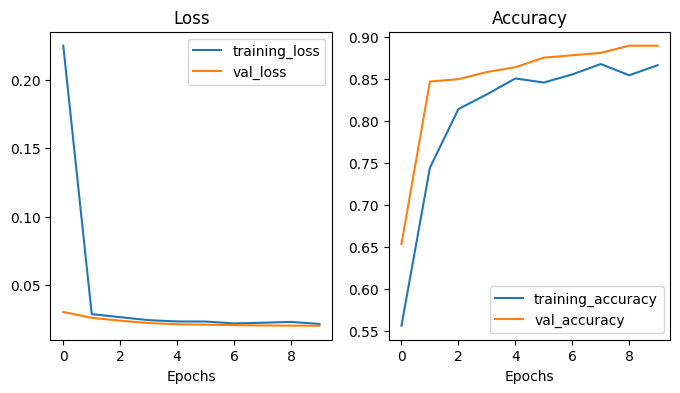

In [92]:
plot_loss_curves(model_2_history)

In [93]:
model_2.evaluate(test_dataset)

115/115 [==============================] - 3s 23ms/step - loss: 0.0214 - accuracy: 0.8596


[0.02143513411283493, 0.8595582246780396]

In [94]:
model_1.evaluate(test_dataset)

115/115 [==============================] - 1s 5ms/step - loss: 0.0213 - accuracy: 0.8956


[0.021265733987092972, 0.8955549597740173]

In [95]:
predict_abstract(model_2)

1/1 [==============================] - 0s 348ms/step
Abstract:b'off-policy estimation for long-horizon problems is important in many real-life applications such as healthcare and robotics, where high-fidelity simulators may not be available and on-policy evaluation is expensive or impossible. recently, \\cite{liu18breaking} proposed an approach that avoids the \\emph{curse of horizon} suffered by typical importance-sampling-based methods. while showing promising results, this approach is limited in practice as it requires data be drawn from the \\emph{stationary distribution} of a \\emph{known} behavior policy. in this work, we propose a novel approach that eliminates such limitations. in particular, we formulate the problem as solving for the fixed point of a certain operator. using tools from reproducing kernel hilbert spaces (rkhss), we develop a new estimator that computes importance ratios of stationary distributions, without knowledge of how the off-policy data are collected. we 

#model 3: character embeddings Conv1D

In [96]:
train_sentances[:5]

['point clouds have been widely adopted in 3d semantic scene understanding. however, point clouds for typical tasks such as 3d shape segmentation or indoor scenario parsing are much denser than outdoor lidar sweeps for the application of autonomous driving perception. due to the spatial property disparity, many successful methods designed for dense point clouds behave depreciated effectiveness on the sparse data. in this paper, we focus on the semantic segmentation task of sparse outdoor point clouds. we propose a new method called mnew, including multi-domain neighborhood embedding, and attention weighting based on their geometry distance, feature similarity, and neighborhood sparsity. the network architecture inherits pointnet which directly process point clouds to capture pointwise details and global semantics, and is improved by involving multi-scale local neighborhoods in static geometry domain and dynamic feature space. the distance/similarity attention and sparsity-adapted weigh

In [97]:
# make function to split sentances into characters
def split_chars(text):
  return ' '.join(list(text))

# text splittin non character level squence into characters
split_chars(random_train_sentance)

'w e   p r e s e n t   \\ t e x t s c { v x 2 t e x t } ,   a   f r a m e w o r k   f o r   t e x t   g e n e r a t i o n   f r o m   m u l t i m o d a l   i n p u t s   c o n s i s t i n g   o f   v i d e o   p l u s   t e x t ,   s p e e c h ,   o r   a u d i o .   i n   o r d e r   t o   l e v e r a g e   t r a n s f o r m e r   n e t w o r k s ,   w h i c h   h a v e   b e e n   s h o w n   t o   b e   e f f e c t i v e   a t   m o d e l i n g   l a n g u a g e ,   e a c h   m o d a l i t y   i s   f i r s t   c o n v e r t e d   i n t o   a   s e t   o f   l a n g u a g e   e m b e d d i n g s   b y   a   l e a r n a b l e   t o k e n i z e r .   t h i s   a l l o w s   o u r   a p p r o a c h   t o   p e r f o r m   m u l t i m o d a l   f u s i o n   i n   t h e   l a n g u a g e   s p a c e ,   t h u s   e l i m i n a t i n g   t h e   n e e d   f o r   a d - h o c   c r o s s - m o d a l   f u s i o n   m o d u l e s .   t o   a d d r e s s   t h e   n o n - d i f f e r e n t 

In [98]:
train_chars = [split_chars(sentance) for sentance in train_sentances]
val_chars = [split_chars(sentance) for sentance in val_sentances]
test_chars = [split_chars(sentance) for sentance in test_sentances]

In [99]:
train_chars[2]

'w e   i n t r o d u c e   a   n e w   p r o b l e m ,   t h e   o n l i n e   s e l e c t i v e   a n o m a l y   d e t e c t i o n   ( o s a d ) ,   t o   m o d e l   a   s p e c i f i c   s c e n a r i o   e m e r g i n g   f r o m   r e s e a r c h   i n   s l e e p   s c i e n c e .   s c i e n t i s t s   h a v e   s e g m e n t e d   s l e e p   i n t o   s e v e r a l   s t a g e s   a n d   s t a g e   t w o   i s   c h a r a c t e r i z e d   b y   t w o   p a t t e r n s   ( o r   a n o m a l i e s )   i n   t h e   e e g   t i m e   s e r i e s   r e c o r d e d   o n   s l e e p   s u b j e c t s .   t h e s e   t w o   p a t t e r n s   a r e   s l e e p   s p i n d l e   ( s s )   a n d   k - c o m p l e x .   t h e   o s a d   p r o b l e m   w a s   i n t r o d u c e d   t o   d e s i g n   a   r e s i d u a l   s y s t e m ,   w h e r e   a l l   a n o m a l i e s   ( k n o w n   a n d   u n k n o w n )   a r e   d e t e c t e d   b u t   t h e   s y s t e m   o n l y

In [100]:
char_lens = [len(sentance) for sentance in train_sentances]
mean_char_len = np.mean(char_lens)
mean_char_len


1191.31848241069

(array([4.000e+00, 1.000e+01, 4.300e+01, 1.160e+02, 3.760e+02, 8.470e+02,
        1.467e+03, 2.375e+03, 3.273e+03, 4.004e+03, 3.903e+03, 3.715e+03,
        3.223e+03, 2.092e+03, 1.568e+03, 1.098e+03, 7.940e+02, 4.240e+02,
        2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  29.        ,  138.06666667,  247.13333333,  356.2       ,
         465.26666667,  574.33333333,  683.4       ,  792.46666667,
         901.53333333, 1010.6       , 1119.66666667, 1228.73333333,
        1337.8       , 1446.86666667, 1555.93333333, 1665.        ,
        1774.06666667, 1883.13333333, 1992.2       , 2101.26666667,
        2210.33333333, 2319.4       , 2428.46666667, 2537.53333333,
        2646.6       , 2755.66666667, 2864.73333333, 2973.8       ,
        3082.86666667, 3191.93333333, 3301.        ]),
 <BarContainer object of 30 artists>)

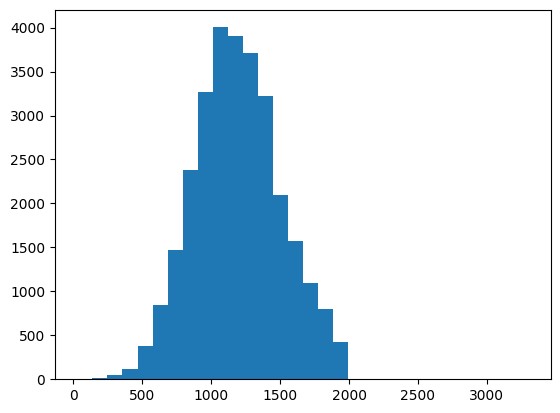

In [101]:
# check the distribution of characters
import matplotlib.pyplot as plt
plt.hist(char_lens, bins = 30)

In [102]:
# Find what character length covers 95% of sequences
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

1745

In [103]:

import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet


'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [104]:
# create char- level token vectorizer instance

NUM_CHAR_TOKENS = len(alphabet) + 2
char_vectorizer = TextVectorization(max_tokens = NUM_CHAR_TOKENS,
                                    output_sequence_length = output_seq_char_len,
                                    standardize = None,
                                    name = 'char_vectorizer')


In [105]:

# Adapt character char vectorizer to training character
char_vectorizer.adapt(train_chars)

In [106]:

char_vocab = char_vectorizer.get_vocabulary()
char_vocab

['',
 '[UNK]',
 'e',
 't',
 'a',
 'i',
 'n',
 'o',
 'r',
 's',
 'l',
 'c',
 'd',
 'h',
 'm',
 'p',
 'u',
 'f',
 'g',
 'w',
 'b',
 'v',
 'y',
 '.',
 ',',
 '-',
 'k',
 'x',
 ')',
 '(',
 'z',
 'q',
 'j',
 '1',
 '0',
 '2',
 '3',
 '/',
 '$',
 ':',
 '\\',
 '%',
 "'",
 '5',
 '4',
 '9',
 '}',
 '{',
 '6',
 '8',
 '"',
 '7',
 ';',
 '_',
 '+',
 '^',
 '?',
 '`',
 ']',
 '[',
 '~',
 '=',
 '&',
 '|',
 '*',
 '>',
 '<',
 '@',
 '!',
 '#']

In [107]:
### creating character level embedding
char_embed   = layers.Embedding(input_dim = len(char_vocab),
                                output_dim = 25,
                                mask_zero = True,
                                name = "char_embed")

In [108]:
random_sent = random.choice(train_chars)


print(f"Characterized sentance : \n{random_sent}\n")
print(f"Len of sentance:{len(random_sent.split())}\n")
print(f"Embedded sentance : \n{char_vectorizer(random_sent)}\n")
print(f'len of embedded sentance(Preset): {len(char_vectorizer(random_sent))}\n')

print(f"embedded char sentance:\n{char_embed(char_vectorizer(random_sent))}\n")
print(f"shape of embedded char sentance:{char_embed(char_vectorizer(random_sent)).shape}")

Characterized sentance : 
o b j e c t   d e t e c t i o n   i n   t h r e e - d i m e n s i o n a l   ( 3 d )   s p a c e   a t t r a c t s   m u c h   i n t e r e s t   f r o m   a c a d e m i a   a n d   i n d u s t r y   s i n c e   i t   i s   a n   e s s e n t i a l   t a s k   i n   a i - d r i v e n   a p p l i c a t i o n s   s u c h   a s   r o b o t i c s ,   a u t o n o m o u s   d r i v i n g ,   a n d   a u g m e n t e d   r e a l i t y .   a s   t h e   b a s i c   f o r m a t   o f   3 d   d a t a ,   t h e   p o i n t   c l o u d   c a n   p r o v i d e   d e t a i l e d   g e o m e t r i c   i n f o r m a t i o n   a b o u t   t h e   o b j e c t s   i n   t h e   o r i g i n a l   3 d   s p a c e .   h o w e v e r ,   d u e   t o   3 d   d a t a ' s   s p a r s i t y   a n d   u n o r d e r e d n e s s ,   s p e c i a l l y   d e s i g n e d   n e t w o r k s   a n d   m o d u l e s   a r e   n e e d e d   t o   p r o c e s s   t h i s   t y p e   o f   d a t a .   a 

## Build a Conv1D Model to fit on character embeddings

In [109]:
inputs = layers.Input(shape = (1,), dtype = 'string')

char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)

x = layers.Conv1D(128, kernel_size = 5, padding = 'same', activation = 'relu')(char_embeddings)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(151, activation = 'sigmoid')(x)
model_3 = tf.keras.Model(inputs,
                         outputs,
                         name = 'model_3_conv1d_char_embeddings')

# compile the model
model_3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])




In [110]:
model_3.summary()

Model: "model_3_conv1d_char_embeddings"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 1745)             0         
 ization)                                                        
                                                                 
 char_embed (Embedding)      (None, 1745, 25)          1750      
                                                                 
 conv1d_1 (Conv1D)           (None, 1745, 128)         16128     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_3 (Dense)             (None, 

In [111]:
type(train_chars)

list

In [112]:
def make_dataset(dataframe, char_list,is_train=True):
  labels = tf.ragged.constant(dataframe['terms'].values)
  label_binarized = lookup(labels).numpy()
  dataset = tf.data.Dataset.from_tensor_slices(
      (char_list, label_binarized)
  )
  dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
  return dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [113]:
train_char_dataset = make_dataset(train_data, train_chars, is_train = True)
val_char_dataset = make_dataset(val_data, val_chars, is_train = False)
test_char_dataset = make_dataset(test_data, test_chars, is_train = False)

In [114]:
train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 151), dtype=tf.float32, name=None))>

In [115]:
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch = int(0.1 * len(train_char_dataset)),
                              epochs = 10,
                              validation_data = val_char_dataset,
                              validation_steps = int(0.1*len(val_char_dataset)))

Epoch 1/10
91/91 [==============================] - 6s 52ms/step - loss: 0.2413 - accuracy: 0.4952 - val_loss: 0.0281 - val_accuracy: 0.5966
Epoch 2/10
91/91 [==============================] - 1s 13ms/step - loss: 0.0287 - accuracy: 0.5604 - val_loss: 0.0267 - val_accuracy: 0.5966
Epoch 3/10
91/91 [==============================] - 1s 15ms/step - loss: 0.0284 - accuracy: 0.5728 - val_loss: 0.0263 - val_accuracy: 0.6818
Epoch 4/10
91/91 [==============================] - 1s 14ms/step - loss: 0.0274 - accuracy: 0.6288 - val_loss: 0.0263 - val_accuracy: 0.5710
Epoch 5/10
91/91 [==============================] - 1s 12ms/step - loss: 0.0277 - accuracy: 0.6666 - val_loss: 0.0257 - val_accuracy: 0.6619
Epoch 6/10
91/91 [==============================] - 1s 12ms/step - loss: 0.0274 - accuracy: 0.7304 - val_loss: 0.0256 - val_accuracy: 0.7670
Epoch 7/10
91/91 [==============================] - 1s 12ms/step - loss: 0.0264 - accuracy: 0.7754 - val_loss: 0.0249 - val_accuracy: 0.7841
Epoch 8/10
91

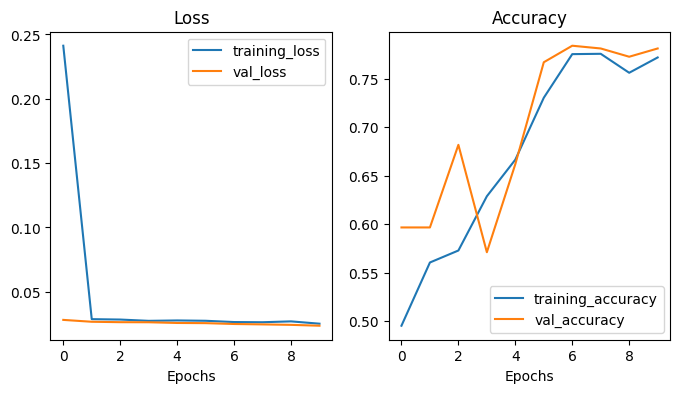

In [116]:
plot_loss_curves(model_3_history)

In [117]:
model_3.evaluate(test_char_dataset)

115/115 [==============================] - 1s 9ms/step - loss: 0.0255 - accuracy: 0.7824


[0.025506187230348587, 0.7823834419250488]

# Model4: Combining pretrained token + character embeddings

##Setup token inputs/model

In [130]:
token_inputs = layers.Input(shape = [], dtype = tf.string, name = 'token_input')
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation = 'relu')(token_embeddings)
token_model = tf.keras.Model(token_inputs,token_output)

## Setup Char inputs/mmodel

In [131]:
char_inputs = layers.Input(shape = (1,), dtype =tf.string, name = 'char_input')
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(char_inputs,
                            char_bi_lstm)


###Concatenate Token and char inputs

In [132]:
token_char_concat = layers.Concatenate(name = 'token_char_hybrid')([token_model.output,char_model.output])

In [133]:
# num_classes

In [134]:
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(128, activation = 'relu')(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)

output_layer = layers.Dense(151, activation = 'sigmoid')(final_dropout)

In [135]:
model_4 = tf.keras.Model(inputs = [token_model.input,char_model.input],
                         outputs = output_layer,
                         name = 'model_4_token_nd_char_emmbedding')

In [136]:
model_4.summary()

Model: "model_4_token_nd_char_emmbedding"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 1745)        0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 universal_sentance_encoder (Ke  (None, 512)         256797824   ['

In [137]:
model_4.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

## combiningg token and char data into tf.data dataset

In [138]:
def make_dataset(dataframe, char_list,is_train=True):
  labels = tf.ragged.constant(dataframe['terms'].values)
  label_binarized = lookup(labels).numpy()
  dataset = tf.data.Dataset.from_tensor_slices(
      (char_list, label_binarized)
  )
  dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
  return dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [139]:
def make_dataset(dataframe, char_list,is_train=True):
  labels = tf.ragged.constant(dataframe['terms'].values)
  label_binarized = lookup(labels).numpy()


  char_token_data = tf.data.Dataset.from_tensor_slices((dataframe['cleaned_summary'].tolist(),char_list))
  char_token_labels = tf.data.Dataset.from_tensor_slices(label_binarized)

  dataset = tf.data.Dataset.zip(
      ( char_token_data, char_token_labels)
  )
  dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
  return dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [140]:
train_char_token_dataset = make_dataset(train_data, train_chars, is_train= True)
val_char_token_dataset = make_dataset(val_data, val_chars, is_train= False)
test_char_token_dataset = make_dataset(test_data, test_chars, is_train= False)

In [141]:
train_char_token_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 151), dtype=tf.float32, name=None))>

In [142]:
# fit a model
model_4_history = model_4.fit(train_char_token_dataset,
                              steps_per_epoch = int(0.1*len(train_char_token_dataset)),
                              epochs = 10,
                              validation_data = val_char_token_dataset,
                              validation_steps = int(0.1* len(val_char_token_dataset)))

Epoch 1/10
91/91 [==============================] - 27s 176ms/step - loss: 0.1798 - accuracy: 0.3647 - val_loss: 0.0271 - val_accuracy: 0.6335
Epoch 2/10
91/91 [==============================] - 11s 116ms/step - loss: 0.0332 - accuracy: 0.5086 - val_loss: 0.0247 - val_accuracy: 0.8608
Epoch 3/10
91/91 [==============================] - 10s 115ms/step - loss: 0.0286 - accuracy: 0.6823 - val_loss: 0.0217 - val_accuracy: 0.8693
Epoch 4/10
91/91 [==============================] - 11s 118ms/step - loss: 0.0261 - accuracy: 0.7819 - val_loss: 0.0205 - val_accuracy: 0.8722
Epoch 5/10
91/91 [==============================] - 11s 117ms/step - loss: 0.0250 - accuracy: 0.8259 - val_loss: 0.0200 - val_accuracy: 0.8835
Epoch 6/10
91/91 [==============================] - 11s 119ms/step - loss: 0.0246 - accuracy: 0.8280 - val_loss: 0.0199 - val_accuracy: 0.8949
Epoch 7/10
91/91 [==============================] - 10s 108ms/step - loss: 0.0238 - accuracy: 0.8427 - val_loss: 0.0194 - val_accuracy: 0.9034

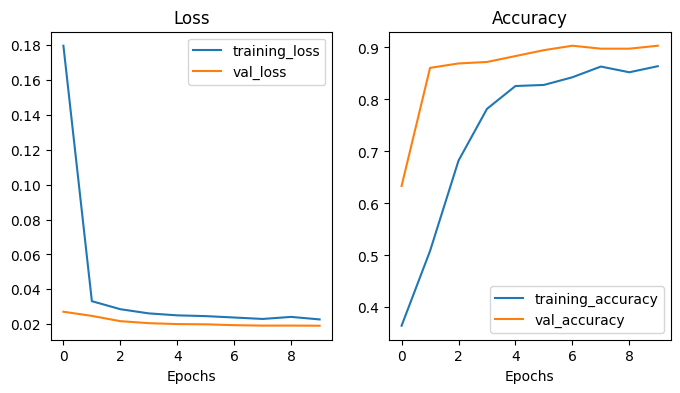

In [143]:
plot_loss_curves(model_4_history)

In [148]:
model_4.evaluate(test_char_token_dataset)

115/115 [==============================] - 10s 86ms/step - loss: 0.0210 - accuracy: 0.8696


[0.021038470789790154, 0.8696482181549072]

## compare accuracy and loss of every model

In [150]:
model_1_Conv1D = model_1.evaluate(test_dataset)
model_2_Tf_hub = model_2.evaluate(test_dataset)
model_3_char_embed = model_3.evaluate(test_char_dataset)
model_4_hybrid = model_4.evaluate(test_char_token_dataset)

115/115 [==============================] - 6s 55ms/step - loss: 0.0210 - accuracy: 0.8696


In [151]:
data = {'loss': [model_1_Conv1D[0],model_2_Tf_hub[0],model_3_char_embed[0],model_4_hybrid[0],],
        'accuracy': [model_1_Conv1D[1],model_2_Tf_hub[1],model_3_char_embed[1],model_4_hybrid[1],]}


compare_df = pd.DataFrame(data, index=['model_1_Conv1D',
                               'Model_2_Tf_hub',
                               'Model_3_char_embedd',
                               'Model_4_hybrid'])


compare_df

,loss,accuracy
model_1_Conv1D,0.021266,0.895555
Model_2_Tf_hub,0.021435,0.859558
Model_3_char_embedd,0.025533,0.776929
Model_4_hybrid,0.021038,0.869648
